In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gdp = pd.read_csv(r'data\API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6298258.csv')

In [3]:
mt_gdp = gdp[[str(x) for x in range(1960, 2023)]].to_numpy()
nan_count = np.count_nonzero(np.isnan(mt_gdp))
not_nan_count = np.count_nonzero(~np.isnan(mt_gdp))

print(f'nan: {nan_count} \nnot nan: {not_nan_count} \nratio {nan_count/not_nan_count}')


nan: 3558 
not nan: 13200 
ratio 0.26954545454545453


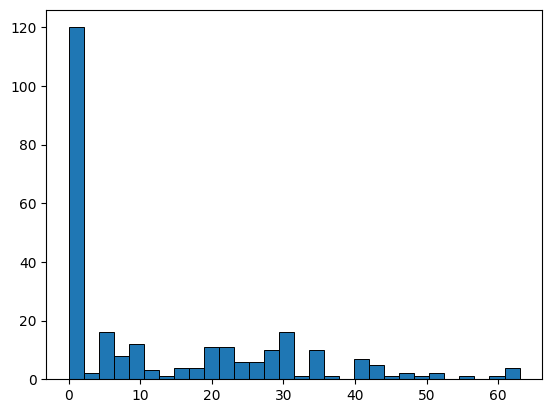

In [11]:
# histogram of nan values
nan_dist = np.isnan(mt_gdp).sum(axis=1)


plt.hist(nan_dist,bins=30, edgecolor='black', linewidth=0.7)
plt.title = 'Distribution of miss GDP values'
plt.ylabel = 'Number of Country'
plt.xlabel = 'Count of miss values'
plt.show()


In [5]:
sample = np.log(mt_gdp[~np.isnan(mt_gdp).any(axis=1)])


print(sample)
# Select randomly some of values
import math
miss_ratio = nan_count/not_nan_count
num_element = sample.size
miss_values_index = np.random.randint(0,num_element-1, size=math.floor(miss_ratio*num_element))

nan_sample = sample.copy()

col_count = len(sample[0])
row_count = len(sample)

miss_indexs = []
for j in miss_values_index:
    ii = (j/row_count)
    row_id = int(ii)
    col_id = int(round((ii - row_id)*col_count, 0))
    miss_indexs.append([row_id, col_id])
    nan_sample[row_id, col_id] = np.nan


[[23.63985182 23.68680102 23.74400615 ... 27.55724565 27.7140109
  27.80088009]
 [23.06619085 23.13344218 23.20414039 ... 27.39144635 27.4625167
  27.49793956]
 [23.6467802  23.70301522 23.71511875 ... 27.91648689 28.07508736
  28.15749761]
 ...
 [22.89215912 22.94529102 23.00707537 ... 26.54717348 26.76380101
  26.72782145]
 [20.38499198 20.36127064 20.35674668 ... 23.61976535 23.8186813
  24.09619344]
 [20.77489995 20.81552282 20.8344508  ... 23.79176976 24.06864175
  24.03259012]]


Sum errors 2146.99 with neighbors 1
Sum errors 1963.70 with neighbors 2
Sum errors 1924.61 with neighbors 3
Sum errors 1947.36 with neighbors 4
Sum errors 1956.02 with neighbors 5
Sum errors 1975.05 with neighbors 6
Sum errors 1978.58 with neighbors 7
Sum errors 2010.67 with neighbors 8
Sum errors 2061.54 with neighbors 9
Sum errors 2115.34 with neighbors 10
Sum errors 2158.70 with neighbors 11
Sum errors 2186.53 with neighbors 12
Sum errors 2208.57 with neighbors 13
Sum errors 2225.22 with neighbors 14
Sum errors 2244.97 with neighbors 15


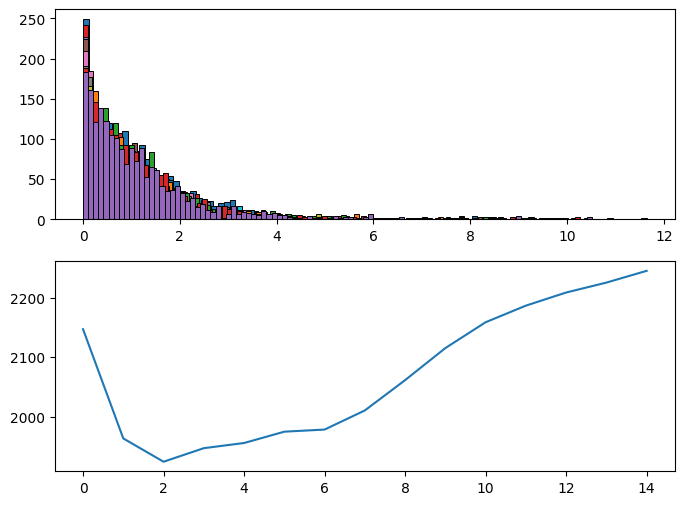

In [10]:
from sklearn.impute import KNNImputer


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6))

ns = range(1,16)
sum_errors = []
for n in ns:
    imputer = KNNImputer(n_neighbors=n, weights="distance")
    test_prediction = imputer.fit_transform(nan_sample)

    errors = []
    for k in miss_indexs:
        errors.append(abs(sample[k[0], k[1]] - test_prediction[k[0], k[1]])/sample[k[0], k[1]]*100)

    errors = [item for item in errors if item < 100]
    sum_errors.append(sum(errors))

    print(f"Sum errors {sum(errors):.2f} with neighbors {n}")
    ax1.hist(errors, bins=100, edgecolor='black', linewidth=0.7)

ax2.plot(sum_errors)

plt.show()